In [16]:
import nltk
import pandas as pd
import string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import unidecode
import re

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [257]:
leman=[['poder', 'don', 'dinero', 'evidente', 'justicia', 'evidenciar', 'claro', 'contundente', 'llevar', 'dinero', 'ctos', 'ahorrista', 'cto', 'corriente', 'inversión', 'ahora', 'decir', 'inocente', 'bien', 'vuelto'], ['asi', 'ir', 'deber', 'reescribir', 'historia', 'feriado', 'bancario', 'existio', 'migracion', 'masivo', 'familia', 'destruido', 'muerte', 'pai', 'saqueado', 'repartido', 'fraccionado', 'quiebra', 'ahora', 'repetir', 'historia', 'pesadilla', 'fin', 'venir', 'bucaram', 'socio', 'negocio', 'inocente', 'isaia', 'inocente', 'moreno', 'inocente', 'indeminizar él', 'calumnia', 'devolver', 'robar', 'delincuente', 'dios', 'crio', 'diablo', 'junta', 'juez', 'fiscal', 'ente', 'pagado', 'plata', 'pueblo', 'encontra', 'pueblo'], ['apoyo', 'total', 'fiscal', 'diana', 'salazar'], ['alguien', 'saber', 'cuanto', 'año', 'proceso', 'judicial', 'deber', 'derecho'], ['fiscal', 'merecer', 'reconocimiento', 'lucha', 'anticorrupcion'], ['perro', 'hdp', 'tanto', 'familia', 'sufrir', 'suicidar', 'poder', 'libre', 'primero', 'favor', 'lasso', 'dirar', 'votar', 'todavia', 'presidente', 'mente', 'inocente'], ['isaia', 'millón', 'inocente', 'correa', 'culpable', 'lindo', 'justicia'], ['vivo', 'patria', 'florindo'], ['rio', 'sonar', 'lenin', 'traer', 'bucar', 'laso', 'isaia', 'mejor', 'venir', 'si', 'banquero', 'florindo'], ['heroina', 'resultar', 'ahora', 'dos', 'diablo', 'angelito', 'cave', 'dudar', 'jamil', 'tambien', 'saldran', 'perseguido', 'politico', 'angelito', 'peor', 'ahora', 'ecuatoriano', 'tendra', 'indemnizar él', 'osea', 'dinero', 'pondrar', 'dar él', 'ficha', 'dios', 'pasar', 'justicia', 'humano', 'encima', 'pandemio', 'peor', 'apocalipsis'], ['hecho', 'indignado', 'jajajajaja'], ['seguro', 'dar', 'buen', 'tajado', 'pastel', 'decir', 'ilegitimo'], ['ladtón', 'libre', 'inocente', 'carcel', 'ley', 'injusticia'], ['definitivamente', 'mejor', 'calificación', 'xq', 'sta', 'demaciado'], ['si', 'si', 'tanto', 'inocente', 'devolver', 'robado', 'vengar', 'devolver', 'robado', 'ecuador', 'fiscalio', 'esperar', 'vez', 'si', 'actue', 'pues', 'sueldo', 'pagar', 'ecuatoriano', 'juez', 'corrupto', 'comer', 'impuesto', 'loscorruptossiemprefueronel él'], ['asi', 'negro', 'justicia', 'querer', 'aunque', 'ladrón', 'dejar', 'libre', 'acusar', 'querer', 'asi', 'inocente'], ['colorin', 'colorado', 'salir', 'moreno', 'juicio', 'robo', 'consumado'], ['banquero', 'defender', 'nuevo', 'presidente', 'ir', 'devolver', 'confisco', 'causa', 'robo', 'descarado', 'cometer', 'feriado', 'bancario', 'ahorrista', 'paso', 'querer', 'pedir', 'indemnizacion', 'gobierno', 'descaro', 'total'], ['dos', 'sujeto', 'dinero', 'feriado', 'comprar', 'cualquiera', 'conciencia', 'lastimosamente', 'peor', 'cierto', 'lasso', 'presidente', 'dos', 'pai'], ['devolver', 'millón', 'interés', 'regresar', 'ecuador'], ['mejor', 'soltar', 'ladrón', 'mejor'], ['inocente', 'lasso', 'aspiazu', 'hermano', 'isaia', 'entonces', 'culpable', 'regresar', 'tal', 'vez', 'algun', 'cargo', 'gobierno'], ['querer', 'equivocar', 'pensar', 'gobierno', 'entrante', 'permitir', 'tal', 'infamia', 'moreno', 'habria', 'puerta', 'ladron', 'bucaram', 'ahora', 'parecer', 'ladrón', 'estaran', 'libre'], ['liberandi', 'sentenciado', 'llevar', 'contrario', 'correa', 'sino', 'liberar', 'gla', 'odiadoro'], ['obra', 'lasso', 'compadre'], ['vivo', 'fiesta', 'pai', 'encontrar'], ['mientras', 'historia', 'amor'], ['pobre', 'pai', 'ir', 'mal', 'peor'], ['pronto', 'pagar', 'carcel', 'hecho'], ['existira', 'justicia'], ['ignorancia', 'juez', 'si', 'declarar', 'inosent', 'logico', 'q', 'ir', 'pedir', 'devolucion', 'bien', 'q', 'mente', 'tanto', 'torp', 'pensar', 'daño', 'q', 'hacer', 'pai', 'gente', 'q', 'oerfudicado'], ['esperar', 'lunes', 'posicionar', 'banquero'], ['est', 'plata', 'lazo', 'sabra', 'tendra', 'amnesia'], ['q', 'votar', 'lasso'], ['recien', 'empezar', 'beatificar', 'disgustar', 'decir', 'correistar', 'banquero', 'chorir'], ['sikeír', 'asi', 'labe', 'mano', 'hotra', 'mismo'], ['justicia', 'peor', 'ojala', 'nuevo', 'gobierno', 'cambi', 'pillo', 'justicia'], ['ahi', 'estar', 'pu', 's', 'solución', 'politica', 'corrupcion'], ['aqui', 'triunfo', 'justicia', 'hermano', 'isaia', 'puro', 'puro', 'mmvg'], ['definitivamente', 'pai', 'solo', 'poncho', 'justicia'], ['mejor', 'fiscal', 'asi', 'duelar', 'mameluco'], ['tooooooma', 'estaran', 'revolcar', 'tumba', 'pobre', 'abuelito', 'q', 'perder', 'ahorro', 'tambien', 'familia', 'destruido', 'x', 'migracion', 'peor', 'q', 'q', 'aplaudir', 'rien'], ['liberar', 'glass'], ['pana', 'ladronasso'], ['esque', 'salir', 'ayudar', 'señor', 'lasso'], ['ver', 'ningun', 'lasisboy', 'opinar', 'acerca', 'ladrón', 'corbata', 'aqui', 'conoscir', 'monton', 'bien', 'decir', 'silencio', 'cómplice', 'conciencia', 'efectolasso'], ['lindo', 'ecuador'], ['cesar', 'cesar', 'pueblo', 'devolver', 'robado'], ['paraq', 'contar', 'sra', 'fiscal', 'cuanta', 'corrupcion', 'ahora', 'q', 'devolver él', 'saqueado', 'contar', 'ahorrista', 'atropello', 'corrupto'], ['si', 'quebrar', 'banco', 'responder', 'depositant', 'aun', 'asi', 'eeuu', 'encontro', 'razón', 'extraditar él', 'belgico', 'encontrar', 'sustento', 'influjo', 'psiquico', 'extraditar', 'correa'], ['importante', 'disolver', 'poder', 'judicial', 'asamblea', 'nacional', 'pai', 'poder', 'progresar', 'existir', 'delincuente', 'administrar', 'justicia', 'fiscalizar', 'crear', 'ley', 'torcida'], ['entonces', 'si', 'peculado', 'plata', 'bien', 'manejadar', 'quebro', 'banco', 'alli', 'dinero', 'juez'], ['apoyo', 'ecuatoriano', 'seguir', 'adelante', 'dra', 'diana', 'honesto', 'respaldar', 'debuelir', 'plata', 'robado'], ['creador', 'mayor', 'atraco', 'pai', 'estar', 'vuelta', 'junto', 'co', 'lasso', 'cabeza', 'vestido', 'honesto', 'segun', 'parte', 'contar'], ['poder', 'ser', 'delincuente', 'culpable', 'muerte', 'mucho', 'gente', 'ecuatoriano', 'quedar', 'castigo'], ['inocente', 'vivir', 'rey', 'mientras', 'nunca', 'recuperar', 'morir', 'justicia'], ['delincuente', 'manejar', 'justicia', 'pai', 'mismo', 'declarar', 'inocente'], ['tocar', 'devolver', 'cuartel', 'decian', 'alguien', 'deserto', 'luego', 'aparecer', 'batallón', 'empezar', 'lanzar', 'cosa', 'hurtada'], ['eeuu', 'seguir', 'libre', 'causante', 'crisis', 'mientras', 'ladrón', 'sacar', 'corbata', 'plata', 'jama', 'serir', 'apresado'], ['hps', 'saber', 'ganar', 'laso', 'bucaram', 'isaia', 'estar', 'libre', 'ahora', 'belleza', 'pai'], ['fiscal', 'pagar', 'corrupcion', 'cometer', 'asi', 'pase', 'año', 'tendra', 'revisar', 'asi', 'año', 'ir', 'ala', 'carcel'], ['jjjo', 'q', 'considensia', 'laso', 'presidente', 'isaia', 'inocente', 'fu', 'feriado', 'bancario', 'alli', 'estar', 'yoyas', 'pueblo', 'despertar', 'ir', 'llevar', 'peso', 'sentir'], ['entonces', 'señora', 'parecer', 'funcionar', 'plata', 'gobernar'], ['persona', 'supuestamente', 'fiscal', 'parte', 'reparto', 'solo', 'dar', 'opinión', 'querer', 'tapar', 'patrón'], ['contar', 'vivir', 'eeuu', 'lujo', 'tanto', 'año'], ['ojo', 'corrupto', 'par', 'angelito'], ['pena', 'pai', 'razon', 'mucho', 'gente', 'ir', 'volver'], ['preguntir', 'famoso', 'jueza', 'camacho', 'dar', 'paso', 'absolucion', 'ñañito', 'isaia'], ['vivo', 'ecuador'], ['perjudicado', 'filanbanco', 'adquirio', 'banco', 'previsoro', 'turbio', 'truculento', 'negociación', 'gato', 'medio', 'noche', 'alvaro', 'guerrero', 'fugo', 'ee', 'uu', 'vender', 'olla', 'aluminio', 'perjudicar', 'accionista', 'banco', 'previsoro', 'dar', 'dacion', 'pago', 'museo', 'nahin', 'issaia', 'sobrevalorar', 'pieza', 'pintura', 'decir', 'ferexpo', 'etc'], ['si', 'peor', 'justicia', 'ecuador', 'covid'], ['influjo', 'psiquico', 'declarar', 'libre', 'culpa', 'isaia'], ['solo', 'poncho', 'quitar', 'propiedad'], ['ojala', 'asi', 'reaccionar', 'rata', 'bucaram', 'ortiz', 'gavilla', 'bucaram', 'pulley'], ['vizcaino', 'delincuente', 'solamente', 'buscar', 'beneficio', 'intentar', 'apruebir', 'ley', 'transporte', 'guillermo', 'lasso', 'cesar', 'monge', 'luis', 'felipe', 'vizcaino', 'pensar', 'reactivacion', 'economico', 'pai', 'solo', 'pensar', 'bolsillo', 'daniel', 'noboa', 'azin', 'rina', 'campain'], ['chulquero', 'lazo', 'iniciado', 'reinar'], ['ahi', 'si', 'decir', 'cancion', 'merengue', 'merengue', 'merengue', 'merengue'], ['fiscal', 'jajajajar', 'indignado', 'tocar', 'tajado', 'v'], ['parecer', 'jugada', 'banquero', 'lasso'], ['ahora', 'dar', 'contar', 'jajaja', 'fiscal', 'hablar', 'ajjaja', 'comprado', 'billete', 'capaz', 'acusar', 'inocente'], ['claro', 'man', 'usar', 'influso', 'psiquico'], ['bien', 'sra', 'dianito', 'ud', 'unico', 'puesto', 'seguir', 'defender', 'pueblo'], ['poder', 'decir', 'buen', 'fiscal', 'pasado', 'mucho', 'cosa'], ['proteger', 'delincuente'], ['trabajar', 'holgazán', 'indemnización', 'par', 'sinverguenza', 'pagar', 'solo'], ['mano', 'negro'], ['fiscal', 'deber', 'denunciar', 'hecho', 'escrito', 'organismo', 'internacional'], ['preguntar', 'tanto', 'podrida', 'justicia'], ['buen', 'obra', 'teatro'], ['ahora', 'pueblo', 'pagar', 'devolver', 'dinero', 'cosa'], ['llamar', 'justicia', 'ciego'], ['poder', 'esperar', 'peste', 'negro'], ['fiscal', 'sera', 'juzgado', 'par', 'año', 'encontrar', 'cuanto', 'costo', 'honestidad', 'millón'], ['defensa'], ['buenisimo', 'fiscal', 'volvimos', 'buen', 'tiempo'], ['je', 'je', 'je', 'je', 'justicia', 'regir', 'pai'], ['creer', 'teatro', 'intentar', 'limpiar', 'error', 'fiscal'], ['deje', 'fiscal', 'haga él', 'pagar', 'verguenza'], ['pena', 'pai', 'tanto', 'ingenuidad'], ['justicia', 'ecuatoriano', 'v'], ['grande', 'dianito', 'mejor', 'fiscal'], ['cada', 'vez', 'peor', 'servir', 'pegado'], ['fiscal', 'si', 'sorprender', 'solo', 'juicio', 'dudoso'], ['sorpresa', 'laso'], ['vga', 'ley', 'pai'], ['proceder', 'nulidad', 'permitir', 'salir'], ['fin', 'ir', 'hacer', 'bueno'], ['reaccion', 'tardiar'], ['mono', 'terminar', 'llenar', 'bolsillo', 'ir él'], ['fiscal'], ['cosa'], ['influjo', 'psiquico'], ['menos', 'asi', 'teatro'], ['luis', 'felipe', 'vizcaino', 'rata', 'alcantarillo', 'guillermo', 'lasso', 'cesar', 'monge', 'decir', 'pagar', 'impuesto', 'importar', 'neumatico', 'vizcaino', 'solo', 'interesar', 'bolsillo', 'asamblea', 'nacional', 'ecuador', 'fiscalio', 'general', 'ecuador', 'andersser', 'boscar', 'pico'], ['banquero', 'tenian', 'q', 'ser'], ['si', 'aprobar', 'ahorcar'], ['x'], ['cuanto', 'habra', 'billeteado'], ['regresar', 'robar', 'invertir', 'hacer él', 'santo'], ['solo', 'ecuador'], ['llegar', 'fin', 'hombre', 'araña'], ['maldito', 'perjudicado', 'bien', 'gracias', 'maldito', 'perro'], ['viejo', 'chismosa', 'tal'], ['probe', 'ecuador'], ['peeeeeero', 'induccion', 'psiquico'], ['vaquero'], ['igual', 'prometer', 'prometer', 'total', 'quedar', 'mismo'], ['absolutamente', 'juez', 'malandrín'], ['solo', 'correistas', 'gustar', 'trabajar', 'fiscal', 'diana', 'salazar', 'mayorio', 'investigo'], ['llego', 'cheque', 'jajaja'], ['carajo', 'pasar', 'plata', 'bailar', 'mono'], ['mafia', 'regrezar', 'organizar', 'atraco', 'final', 'cuanto', 'habran', 'dado', 'isaia', 'pra'], ['claro', 'ahora', 'angelito'], ['jjajaj', 'payás', 'd', 'salazar', 'si', 'brillar', 'ojo', 'dolar'], ['aja', 'si', 'decir'], ['fiscalio', 'uso', 'influjo', 'psiquico', 'infalible'], ['ja', 'ja', 'armar', 'show', 'nuevamente'], ['devolver', 'productivo', 'empresa', 'quebrado', 'robolucionario'], ['país', 'encontrar', 'alberto', 'dagik', 'bucarán', 'ahora', 'isaia', 'fin', 'película', 'tierra', 'político', 'ladrón', 'junto', 'banquero', 'empresario', 'corrupto'], ['mientras'], ['ahi', 'dar', 'gana', 'formar', 'grupo', 'armado', 'matar', 'ratero', 'ladrón', 'todo', 'vida', 'incluido', 'autoridad', 'complices', 'sinverguenzo', 'ladrón'], ['dra', 'salazar', 'deje', 'delincuente', 'salir'], ['tampoco', 'migracion', 'masivo', 'feriado', 'bancario', 'poder', 'don', 'dinero'], ['gobierno', 'circo', 'teatro', 'daño', 'hecho', 'pai'], ['si', 'influjo', 'psiquico', 'servir', 'decir'], ['ladrón', 'llevar', 'mil', 'millón', 'paso', 'osea', 'ir', 'seguir', 'circulo', 'corrupcion', 'parecer', 'ir', 'aclarar', 'panorama'], ['raro', 'ver', 'burro', 'decir', 'isi', 'ista', 'bien', 'volver', 'dimicricia', 'burro', 'maldito'], ['dar', 'merecido', 'reconocimiento', 'reconocimiento', 'lucha', 'anticorrupcion', 'jjjjjjjjj', 'si', 'asi', 'ir', 'pared', 'alcanzar', 'tanto', 'honor'], ['caramba', 'sorprender', 'tarado', 'ver', 'decir', 'ciego'], ['sra', 'fiscal', 'mano', 'duro', 'choro'], ['ilegitimo', 'cargo', 'ocupar'], ['callar', 'inutil', 'sinverguenzo', 'diferente', 'juez', 'corrupto'], ['pana', 'lasso', 'pues', 'ingnorat'], ['pues', 'si', 'ex', 'sentensiaods', 'resultar', 'inocente', 'comp ', 'variar', 'banquero', 'coincidencia'], ['pensar', 'ir', 'vender', 'pai'], ['apoyo', 'total', 'fiscal', 'diana', 'salazar'], ['ladrón', 'entender', 'escoria', 'sociedad'], ['show'], ['dios', 'mio', 'cuanto', 'dinero', 'estar', 'llevar', 'hecho', 'investiguenlo', 'verar', 'dinero', 'sinverguenzo'], ['cuanto', 'pagariar', 'fiscal', 'sinverguenzo'], ['ladrón', 'año'], ['juez', 'centavo'], ['pillo', 'saber', 'escabullir él'], ['puro', 'lampara'], ['asi', 'ir'], ['payás', 'mona'], ['bien', 'fiscal'], ['jaja'], ['pai', 'justicia'], ['vendrar', 'cosa', 'peor', 'votar', 'inutil'], ['si', 'juez', 'gran', 'mayorio', 'fiscal', 'ladrón', 'delincuente'], ['terrible'], ['bien', 'sra', 'fizcal'], ['quero', 'vomitar'], ['showw', 'sinverguenza'], ['puro', 'show'], ['ladrón'], ['buen', 'trabajo', 'dra', 'salazar'], ['carc', 'l', 'basura'], ['justicia', 'podrida'], ['billete'], ['ladrón', 'meco'], ['efecto', 'lasso'], [], ['gracias', 'burro'], ['ahora', 'presidente', 'banquero', 'ladron', 'q', 'quejar', 'arriba', 'impunidad'], ['direccionado'], ['fiscal'], ['apoyo', 'fiscal'], ['siquiera', 'reaccionar'], ['juez', 'corrupts', 'simvergueza', 'descarado'], ['harta', 'corrupcion', 'pai'], ['viejo', 'desgraciado'], ['corrupto', 'juez'], ['bruto'], ['solo', 'dirir'], ['lacra', 'mal', 'viviente'], ['chiste', 'leer', 'bien'], ['posi'], ['corrupcion', 'puro'], ['empezo', 'circo'], ['vivo', 'patria'], ['tarea', 'sinverguenza'], ['infamia'], [], ['ojala', 'morar', 'tres', 'mamarracho'], ['jajaja', 'lassies ', 'boys'], [], ['bien', 'hecho', 'fiscal', 'nacion', 'esperar', 'meta', 'preso', 'juez', 'vorructo', 'sinverguenza', 'declarar', 'inocente'], ['pasaria', 'ex', 'funcionaria', 'ocl', 'fiscalio', 'deber', 'rendir', 'cuenta', 'caso', 'investigar'], ['victor', 'huir', 'vasconez', 'gomez', 'presion', 'habran', 'juez'], ['sonia', 'rodriguez', 'presion', 'cantidad', 'dolar', 'hacer', 'abrlr', 'ojo', 'abrir', 'mano', 'clarar él', 'inocente'], ['sonia', 'rodriguez', 'mucho', 'plata'], ['betancourt', 'lourd', 'leer', 'muspo'], ['francisco', 'endar'], ['mushpar', 'dejar', 'brecha', 'dos', 'delincuente', 'luego', 'agua', 'calmen ', 'entable', 'juicio', 'devolucion', 'bien', 'incautado'], ['betancourt', 'lourd', 'estimado', 'lourd', 'solito', 'poder', 'defendertir', 'muspo', 'h', 'aslo', 'ignorancia', 'atrevido', 'estupidez', 'andar'], ['alberto', 'ayalo', 'google'], ['mire', 'video', 'vez', 'bueno', 'informar él', 'desconocer', 'realmente', 'hacer', 'isaia', 'cosa', 'si', 'merecer', 'ser', 'escuchada', 'analizado'], ['rodrigo', 'riva', 'asi', 'sra', 'dolar', 'ladron', 'ladron'], ['rodrigo', 'riva', 'diario'], ['rodrigo', 'riva', 'siquiera', 'influjo', 'psiquico'], ['jimmy', 'sevilla', 'vivo', 'borrego', 'sanduchero'], ['jimmy', 'sevilla', 'dolido', 'mula', 'vs', 'borrego', 'ladrón', 'libre', 'profugo', 'grillete', 'inocente', 'carsel', 'injuzticia'], ['cristobal', 'valarezo', 'bucaram', 'regreso', 'juicio', 'prescribio', 'correa', 'control', 'tenia', 'poder', 'evitar él', 'si', 'leer', 'csj', 'declarar', 'inocente', 'fiscal', 'presentar', 'correspondiente', 'argumento', 'legal', 'paso', 'juez', 'estar', 'hacer', 'venir', 'ganar', 'intervenir', 'lenin', 'lasso', 'aqui'], ['cristobal', 'valarezo'], ['irinar', 'montenegro'], ['martha', 'cecilia'], ['ín', 'cisnero'], ['jeferser', 'suarez', 'circulo', 'lasso'], ['monico', 'espinozar'], ['monico', 'espinozar', 'tajado', 'hab él', 'gusto', 'declarar', 'ilegitimo', 'estupidez'], ['orfa', 'guarnizo', 'asi', 'mismo'], ['orfa', 'guarnizo', 'inocente', 'si', 'refieres', 'glass', 'permitir', 'reir yo'], ['francisco', 'serrano', 'illesca', 'riete', 'noma', 'acordaras', 'q', 'viviar', 'tiniebla', 'gracias', 'gla', 'exportador', 'electresidad'], ['katio', 'andrade'], ['lalu', 'benavid', 'si', 'inocente', 'devolver'], ['car él', 'roserir', 'gavirio', 'inocente'], ['lalu', 'benavid', 'tambien', 'acordar', 'inapeiper'], ['janneth', 'ortiz', 'sobretodir', 'negro', 'justicia'], ['jose', 'columbus', 'nader', 'caso', 'cerrado', 'dra', 'apolo', 'jijijiji'], ['jose', 'columbus', 'nader', 'leyo', 'bien'], ['fresia', 'tomalar'], ['car él', 'augusto', 'loachamin', 'collaguazo', 'pronto', 'ocupar', 'cargo', 'público'], ['car él', 'augusto', 'loachamin', 'collaguazo', 'sorprendar', 'si', 'bienen', 'nuevo', 'banco'], ['eliceo', 'pinto'], ['milo', 'simbaña', 'leyo', 'bien'], ['car él', 'malucin', 'robo', 'señor', 'lasso', 'ver', 'libre', 'profugo', 'otritos'], ['martha', 'cecilia'], ['ín', 'cisnero'], ['ian', 'levallois'], ['jenny', 'ordoñez', 'equivocar', 'tratar', 'estimado'], ['marcia', 'zambrano', 'tristeza'], ['marcia', 'zambrano', 'chismoso', 'abundar', 'pai', 'aun', 'gobernar', 'sr', 'lasso'], ['rossán', 'orellán', 'carrasco', 'comun'], ['jenny', 'ordoñez', 'equivocado'], ['jenny', 'ordoñez', 'claro', 'estar', 'libre', 'ladrón', 'andar', 'mexico', 'belgico'], ['rosa', 'mario', 'velasco', 'querer', 'usted', 'delincuente', 'libre'], ['claudio', 'valdivieso', 'cantautor', 'ignorante', 'caso', 'isaía', 'simpre', 'ilegal', 'rafael', 'banda', 'hacer', 'mal', 'incautación', 'ahora', 'ir', 'tocar', 'pagar'], ['claudio', 'valdivieso', 'cantautor'], ['patricio', 'mejia', 'leyo', 'bien'], ['canto', 'xfa', 'enviemir', 'video'], ['majito', 'coro', 'bien', 'payasito', 'americo', 'llamado', 'ecuador', '_'], ['sofi', 'luu', 'salir', 'lasso', 'poder'], ['wilberto', 'ortiz', 'terrible'], ['fabian', 'calderon', 'vera', 'posesion'], ['fabian', 'calderon', 'invitado', 'honor', 'posesión'], ['imbcl', 'votar', 'lenin'], ['richard', 'pila'], ['jaime', 'vinicio', 'terar', 'quilumba', 'leyo', 'bien'], ['jeff', 'begay', 'leyo', 'bien'], ['diosito', 'ud', 'razon', 'amar'], ['diosito'], ['ruben', 't', 'chacon', 'callar', 'troll'], ['ruben', 't', 'chacon'], ['david', 'alejandro'], ['david', 'alejandro'], ['jose', 'lopez', 'si', 'leer', 'muspo'], ['oliver', 'sandokan'], ['leonardo', 'zuñigar'], ['xavier', 'cruz', 'preguntale', 'correistar'], ['teresar', 'leon', 'ayudar', 'robar'], ['ricardo', 'ochoa', 'ignorante', 'señor', 'agrado', 'lasso', 'hacer', 'rafael', 'banda', 'delincuencial', 'isaía', 'ilegal', 'ninguno', 'parte', 'mundo', 'dar', 'derecho', 'defensa', 'repetir', 'ningun', 'lugar', 'incautación', 'ilegal', 'ahora', 'tocar', 'pagar'], ['ricardo', 'ochoa', 'presidente', 'interferir', 'justicia', 'mameluco', 'convencido', 'metia', 'mano', 'creia', 'juez', 'cada', 'sabado', 'cosa', 'president', 'dictadura', 'interfierar', 'justicia', 'despabilatar']]

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [258]:
from gensim import corpora, models
import gensim
diccionario_LDA=corpora.Dictionary(leman)
diccionario_LDA

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [259]:
corpus = [diccionario_LDA.doc2bow(text) for text in leman]
corpus

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 2),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1)],
 [(0, 1),
  (13, 3),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 2),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 2),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1)],
 [(36, 1), (62, 1), (63, 1), (64, 1), (65, 1)],
 [(24, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1)],
 [(36, 1), (73, 1), (74, 1), (75, 1), (76, 1)],
 [(13, 1),
  (17, 1),
  (33, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  

In [260]:
from pprint import pprint
import time
# number of topics
num_topics = 5
# Build LDA model
lda_model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=diccionario_LDA,
                                       num_topics=num_topics,
                                      per_word_topics =True,
                                      passes=30,
                                    chunksize=5, 
                                   iterations = 50,
                                   eta='auto',
                                   random_state = 42
                                       #workers=5
                                      )
# passes = numero de iteraciones para el modelo, entrenamiento 
# Alfa y eta: son hiperparámetros que afectan la densidad de tópicos. El valor por defecto de ambos es 1/num_topics
# 
# chunksize - número de documentos a considerar a la vez (afecta el consumo de memoria)
# per_word_topics- establecer esto en True permite la extracción de los temas más probables dada una palabra. El proceso de formación se establece de tal manera que cada palabra se asignará a un tema.
# Print the Keyword in the 10 topics
# workers=7, # Num. Processing Cores - 1
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsum

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsum

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsum

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsum

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsum

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsum

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsum

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsum

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsum

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsum

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsum

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsum

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsum

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsum

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsum

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsum

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsum

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsum

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsum

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsum

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsum

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsum

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsum

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsum

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsum

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsum

[(0,
  '0.028*"ilegal" + 0.020*"ahora" + 0.019*"hacer" + 0.018*"pagar" + '
  '0.017*"tocar" + 0.017*"rafael" + 0.017*"incautación" + 0.017*"isaía" + '
  '0.017*"banda" + 0.017*"ignorante"'),
 (1,
  '0.052*"bien" + 0.035*"leyo" + 0.020*"jose" + 0.019*"jenny" + '
  '0.019*"ordoñez" + 0.018*"leer" + 0.017*"si" + 0.016*"muspo" + '
  '0.015*"fiscal" + 0.010*"lopez"'),
 (2,
  '0.035*"justicia" + 0.021*"libre" + 0.018*"juez" + 0.017*"mano" + '
  '0.016*"ladrón" + 0.015*"lasso" + 0.015*"cosa" + 0.015*"presidente" + '
  '0.014*"cada" + 0.014*"ochoa"'),
 (3,
  '0.020*"diosito" + 0.017*"lasso" + 0.016*"robar" + 0.016*"si" + '
  '0.016*"ayudar" + 0.016*"leon" + 0.016*"teresar" + 0.013*"marcia" + '
  '0.013*"zambrano" + 0.012*"lenin"'),
 (4,
  '0.025*"alejandro" + 0.025*"david" + 0.020*"fabian" + 0.020*"calderon" + '
  '0.017*"correistar" + 0.017*"cruz" + 0.017*"xavier" + 0.017*"preguntale" + '
  '0.011*"honor" + 0.010*"martha"')]


C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\gensim\models\ldamodel.py:853: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsum

In [261]:
import pyLDAvis
import pyLDAvis.gensim_models
vis = pyLDAvis.gensim_models.prepare(topic_model=lda_model, corpus=corpus, dictionary=diccionario_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)


C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [262]:
import math
import pandas as pd
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()
    #ldamode=None
    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list  
        
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                d=int(topic_num)
                sent_topics_df = sent_topics_df.append(pd.Series([int(format(d, '.0f')), round((prop_topic*100),2), topic_keywords]), ignore_index=True)
            else:
                break
    #sent_topics_df.columns = ['Topico', 'Coherencia ', 'Palabras claves']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    sent_topics_df.columns = ['topico', 'coherencia', 'palabras claves','comentario']
    return(sent_topics_df)

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [263]:
comen=['El poder de don dinero es evidente en la justicia La evidencia es clara y contundente se llevaron el dinero de ctas ahorristas y cta Corrientes inversiones. Y ahora dicen son inocentes y bienes por el vuelto', 'Así como vamos se debe reescribir la historia. No hubo Feriado Bancario, no existió migración masiva, familias destruidas, muertes.                                     Un país saqueado, repartido, fraccionado, en la quiebra ahora repite la historia como una pesadilla sin fin; vinieron los Bucaram, los socios y sus negocios "Inocentes"  los Isaías "Inocentes" Moreno Inocente y a indeminizarlos por calumnias, a devolver lo que les robamos, 👁 nosotros fuimos los delincuentes.                                     Dios los cria,  el Diablo los junta"      Los jueces, la fiscal, los entes pagados con plata del pueblo, encontra del pueblo.', 'Apoyo total a la Fiscal Diana Salazar.', 'Alguien sabe cuántos años tiene este proceso judicial , es para un deber de derecho ????', 'La Fiscal se merece otro reconocimiento por su lucha anticorrupción!! 🤢', 'Perros HDP tantas familias que sufrieron muchos se suicidaron como pueden estar libres, el primer favor de Lasso que dirán los que votaron por el; que todavía no es presidente mentes inocentes', 'Los Isaías por $6.000 MILLONES... INOCENTES. El Correa por $6.000.... CULPABLE  LINDA JUSTICIA', 'Viva la patria florindos', 'Cuando el río suena..Lenin trajo a Bucaran ,y Laso a los Isaías....lo mejor está por venir. Si pero para los banqueros.no para florindos.', 'Que heroínas resulta que ahora estos dos diablos son angelitos, y no me cave  duda que Jamil también saldrán que es un perseguido político que es otro angelito y lo peor ahora el estado ecuatoriano tendrá que indemnizarlos osea nuestro dinero se pondrá para darles,, a estas fichas,,,, Dios que pasa con esta justicia humana,, encima la pandemia esto Está peor que la apocalipsis,,,', 'Hecha la indignada... Jajajajaja', 'Seguro ,No le dieron su buena tajada del pastel...que por eso dice ilegítima...', 'Los ladtones libres y los inocentes a la carcel que leyes  y que injusticia', 'Definitivamente 10 / 20 Fue la mejor CALIFICACIÓN..... xq para sta hasta el 0⃣ es DEMACIADOS', 'Si si son tan inocentes que devuelvan lo robado que vengan a devolver lo robado #Ecuador #Fiscalía, esperemos que esta vez si actúe, pues su sueldo pagamos todos los ecuatorianos. Todos estos jueces corruptos comen de nuestros impuestos #LosCorruptosSiempreFueronEllos', 'Así es está negra justicia...a los que ellos quieren aunque sean ladrones los dejan libres....y acusan a los que ellos quieren así sean inocentes.', 'Y colorin colorado antes de que salga Moreno este juicio y robo se ha consumado', 'Entre banqueros se defienden su nuevo presidente les va a devolver lo que el estado les confiscó a causa del robo descarado que cometieron en el feriado bancario a todos sus ahorristas. Y de paso quieren pedir indemnización al gobierno !!!! Esto es un descaro total !!!', 'Estos dos sujetos con el dinero del feriado compran cualquier conciencia lastimosamente peor cierto y con lasso de presidente a estos dos los tendremos en el pais', 'Qué devuelvan los 2.500 millones e intereses y que regresen al Ecuador.', 'Mejor suelten a todos los ladrones mejor', 'Son inocentes Lasso Aspiazu  e Hermanos Isaías entonces quiénes son los culpables  Que regresen  tal vez hay algún cargo en el Gobierno', 'Me quiero equivocar pensando que este gobierno entrante permita tal infamia ...Moreno habría las puertas al ladrón de Bucaram ,ahora con este al parecer los ladrones estarán todos libres', 'Esta esta liberandi a todos los sentenciados  por llevar la contraria a correa sino por que no libera a Glas esta odiadora', 'Obra de lasso son sus compadres....', 'Viva la fiesta en el país del encuentro.', 'Mientras tanto una historia de amor', 'Pobre de mi pais vamos de mal en peor ....', 'Está 10/20 pronto pagará con cárcel todo lo que a hecho', 'Cuando existirá justicia', 'Que ignorancia de esas jueces si les declaran inosentes es lógico q van a pedir la devolución de los bienes q mentes tan torpes no piensan en el daño q le hacen al país y a la gente q fue oerfudicada', 'No esperaron ni hasta el lunes, que se posiciona el otro Banquero..', 'Donde est@ la plata, Lazo sabrá algo o tendrá amnesia', 'Los q votaron por lasso🤡', 'Y esto recién empieza, en poco los beatifican y al que le disgusta le dicen que es correista. Banquero choro', 'Sikiera asi que se labe las manos hotra de las mismas', 'Esta justicia es la peor ojala este nuevo gobierno cambi a estos pillos de la justicia', 'Ahi están sus pu.@s soluciones  politicas contra la corrupción 😡😡', 'Aquí triunfo la justicia Hermanos Isaias son puros.   Pero puros mmvgs ', 'Definitivamente en este país solo para el de poncho es la justicia !! ', 'La mejor fiscal  Así le duela a mameluco', 'Tooooooma tu 10 / 20  Como se estarán ...revolcando en la  tumba...los pobres abuelitos q perdieron sus ahorros...y también familias destruidas x la migración...pero y lo peor q hay 🐴🐴🐴🐴... Q aplauden y se ríen....', 'Liberen a glass', 'Los panas del ladronasso', 'Esque salen ayudar a el Señor  Lasso', 'No veo ningún lasisboy opinando acerca de estos ladrones de corbata 👔 y por aquí conosco un montón, bien dicen, EL SILENCIO ES CÓMPLICE DE SU CONCIENCIA!!!!! #efectolasso.', 'Esté es mi lindo Ecuador 😠😠', 'Al César lo que es del César, y al pueblo devuelvan lo robado.', 'Paraq se de cuenta sra fiscal cuanta corrupcion y ahora  tienen q devolverles todo lo saqueado de los cuenta ahorristas hasta cuando todo este atropello de estos corruptos', 'Si quebraron el banco y no respondieron a los depositantes, y aún así EEUU no encontró razones para extraditarlos, Bélgica, encontrará sustento en el influjo psíquico para extraditar a Correa?.', 'Por esto es importante disolver al Poder Judicial y a la Asamblea Nacional.  El país no puede progresar cuando existen delincuentes administrando justicia, fiscalizando y creando leyes torcidas!!!', 'Entonces si no hubo peculado donde está la plata bien manejada y porque quebró el banco 🤷🏻\u200d♂️ allí hubo dinero para los jueces.', 'Tiene todo el apoyo de los Ecuatorianos siga adelante Dra Diana los que somos honestos la respaldamos que debuelvan  la plata robada.', 'Los creadores del mayor atraco al País están de vuelta junto co Lasso a la cabeza, vestidos de honestos según ellos, por mi parte no como cuento!', 'No puede ser  que los delincuente culpables de la muerte de mucha gente ecuatoriana queden sin castigo ...', 'Que inocentes y viviendo  como reyes mientras otros nunca se recuperaron y murieron que justicia ', 'Los delincuentes  manejan la justicia en este país y ellos mismo se declaran inocentes', 'LES TOCA DEVOLVER COMO EN EL CUARTEL CUANDO DECIAN QUE ALGUIEN DESERTO Y LUEGO APARECÍA EN EL BATALLÓN EMPEZABAN LOS ...........A LANZAR LAS COSAS  HURTADAS  ', 'En EEUU siguen libres, los causantes de la crisis del 2008..... Mientras ellos sean ladrones de saco y corbata. Y tengan plata, jamas serán apresados.', 'Que hps que son desde que se supo que ganó laso los  Bucaram los Isaías están libres ahora belleza de país', 'Está fiscal tiene que pagar todo está corrupción que está cometiendo así pase años se tendrá que revisar así sea 10 años tiene que ir ala cárcel', 'Jjja q considensia no laso presidente y los Isaías inocentes  cuando fu el feriado bancario  alli estan ésas yoyas  pueblo a despertar  te van a llevar en peso sin sentir ', 'Y entonces, señoras parece a no está funcionando, la plata gobierna', 'Está persona que supuestamente es fiscal. Es parte del reparto, solo da opiniones para querer tapar a sus patrones!', 'Que cuenten de que viven en EEUU sus lujos y tantos años ??? ', 'Para los ojos de los corruptos son par angelitos...', 'Que pena de país Razón mucha gente se va y no vuelve', 'Pregunten a la famosa jueza Camacho, ella fué quien dio paso a la absolución de los ñañitos Isaías', 'Viva Ecuador', 'Fui como muchos perjudicado Filanbanco adquirió el Banco de la Previsora en una turbia y truculenta negociaciones de gatos de media noche Alvaro Guerrero se fugo a EE.UU a vender ollas de aluminio, perjudicando a todos los Accionistas del Banco la Previsora. Dieron en dacíon de pago el Museo Nahin Issaias sobrevalorando piezas y pinturas, y que decir de FEREXPO .etc .', 'No se si es peor la Justicia de Ecuador o el Covid  19', '10/20 -> con influjo psíquico declara libre de culpas a los Isaias', 'Solo a los de poncho les quitan  sus propiedades.', 'Ojala asi reaccione con las rata bucaram ortiz y la gavilla bucaram pulley', '#Vizcaíno es un delincuente, solamente busca su beneficio intentando que aprueben la ley del transporte Guillermo Lasso Cesar Monge Luis Felipe Vizcaíno no piensa en la reactivación económica de nuestro país, él sólo piensa en su bolsillo Daniel Noboa  Azin Rina Campain ', 'La era del chulquero  Lazo  a  iniciado...a Reinar', 'Ahí si como dice la canción, es merengue o no es merengue es merengue o no es merengue..', 'La fiscal 10 sobre 20  jajajaja indignada porque no le tocó la tajada :v', 'Esa parece una jugada entre banqueros (lasso) ', 'Ahora se dan cuenta jajaja de qué fiscal estamos hablando ajjaja una comprada por unos billetes capaz de acusar al inocente ', 'Claro  esos  manes  no  usaron  influso psiquico', 'BIEN SRA DIANITA UD ES LA UNICA EN ESE PUESTO QUE SIGUE DEFENDIENDO AL PUEBLO', 'No sé cómo pueden decir que es una buena fiscal se le ha pasado muchas cosas', 'Hasta cuando se los protege a estos delincuentes', 'A trabajar holgazanes, que las indemnizaciones para este par de sinvergüenzas no se pagan solas.', 'Hubo mano negra 😏 ', 'La FISCAL debe denunciar este hecho por escrito a organismos INTERNACIONALES', 'Me pregunto tan podrida esta está justicia', 'Muy  buena obra de teatro🎬', 'Y ahora el pueblo  a pagar para devolver el dinero que  cosa', 'A eso le llaman justicia ciega pero', 'Que se puede esperar de esta peste negra', 'Esta fiscal será juzgada en un par de años.. y se le encontrara cuanto costo su honestidad... millones', 'Que defensa tuvo el estado.', 'Buenísima la fiscal volvimos a los buenos tiempos ', 'Je je je je, y esa es la justicia que rige nuestro país!', 'No le creo, es un teatro que intenta limpiar los errores de la fiscal.', 'No les deje fiscal!! Hágales pagar!!  Sin vergüenzas!! ', 'Que pena de mi País, tanta ingenuidad.', 'Está justicia ecuatoriana de a v....', 'Grande Dianita, la mejor fiscal', 'La 10/20... Cada vez peor... No sirve... Ni una a pegado', 'Esa fiscal si que sorprende !!! Solo juicios dudosos', 'Esa es la sorpresa de laso', 'Vga la ley en el país', 'PROCEDAN CON LA NULIDAD, NO PERMITAN QUE SE SALGAN CON LA SUYA', 'Por fin va a hacer algo bueno', 'Reacción tardía', 'El mono ese se termino de llenar los bolsillos antes de irse', 'Fiscal?', 'La cosa es antes...', 'NO ERA INFLUJO PSIQUICO?????', 'Por lo menos... Así sea teatro de ella', 'Luis Felipe Vizcaíno es una rata de alcantarilla Guillermo Lasso Cesar Monge porque no dice que él no paga impuestos cuando importa sus neumáticos a #Vizcaíno sólo le interesa su bolsillo Asamblea Nacional del Ecuador Fiscalía General del Estado Ecuador Andersson Boscán Pico ', 'banqueros tenían  q ser.....', 'Si no les aprueba...le ahorcan', 'X algo es 10/20😄', 'Cuanto le habrá billeteado', 'Regresan a robar o a invertir  .A hacerse  los santos', 'Solo en Ecuador.', 'Llegará el fin del hombre araña', 'Malditos y los perjudicados bien gracias. Malditos perros', 'Viejas chismosas, tal cual', 'probé mi Ecuador', 'Peeeeeero "inducción psíquica"', 'Una de vaqueros….!!!!!', 'Todos son iguales promete y prometen total para queda en los mismos', 'Todos absolutamente todos los jueces son malandrines .....', 'Solo a los correistas no les gusta como trabaja la Fiscal Diana Salazar, por qué a la mayoría los investigo ! ', 'No le llegó su cheque ? jajaja ', 'Que carajo esta pasando por la plata baila el mono', '. . LAS MAFIAS REGREZAN. . . SE ORGANIZAN. . . PARA EL ATRACO FINAL. . . . .CUANTO HABRAN  DADO LOS ISAIAS. . .PRA ESTO????. . . . .', 'claro como no, ahora son unos "angelitos".', 'Jjajaj payasa D Salazar hay si no te brilla el ojo como dolares', 'Aja.......si la 10/20 lo dice', 'Y por qué Fiscalía no usó la del influjo psíquico?, esa es infalible.', 'ja.ja .armara un show nuevamente', 'Y cuando les devuelvan las productivas empresas, quebradas por los robolucionarios? 😲', 'Este es el PAÍS DEL ENCUENTRO ALBERTO DAGIK LOS BUCARANES AHORA LOS ISAIAS EN FIN LA PELÍCULA TIERRA DE POLÍTICOS LADRONES JUNTO A BANQUEROS Y EMPRESARIOS CORRUPTOS', 'Mientras tanto ', 'Ahí es cuando da ganas de formar un grupo armado.y matar a todos esos rateros, ladrones de toda la vida, incluido,esas autoridades, cómplices de esos sinvergüenza ladrones', 'Dra. Salazar no deje que los delincuentes se salgan con la suya!!!', 'Tampoco hubo migración masiva, ni feriado bancario. El poder de don Dinero', 'El Gobierno de circos y teatros.. cuando daño le han hecho al pais', 'si no es influjo psíquico no sirve diga??', 'Y los ladrones que se llevaron Miles de millones  Que paso   OSEA VAMOS A SEGUIR EL CIRCULO DE CORRUPCION  YA ME PARECE QUE POCO A POCO SE VA ACLARANDO EL PANORAMA', 'Que raro no veo a los Burros diciendo ..! Isi ista bien volvió la dimicricia..! Burros malditos ', 'Y le dieron otro merecido reconocimiento y por esté otro reconocimiento por su lucha anticorrupción  jjjjjjjjj si asi va sus paredes no alcanzará para tantos honores 😂', 'A caramba, me sorprende esta tarada🤬, veremos dijo el ciego ', 'Sra fiscal mano dura contra los choros ', 'ilegítimo es el cargo que ocupa', 'Calla inútil sinvergüenza no eres muy diferente a esos jueces corruptos ', 'Son panas del lasso pues ingnorates', 'No pues si todos los.ex que fueron.sentensiaods resulta que son inocentes y comp.para variar banqueros que coincidencia', 'Pienso que van a vender el pais', 'Apoyo total a la Fiscal Diana Salazar', 'Entre ladrones se entienden escorias de la sociedad', 'Show de la 10/20', 'Dios mío esa es 0/20, cuánto dinero  se estará llevando por todo lo que ha hecho, investiguenla y verán el dinero que tiene esta sinvergüenza.', 'Cuánto te pagarían, que fiscal para sinvergüenza,,', 'Y a los LADRONES de los 14 años cuando', 'Juez de centavo', 'Esos pillos saben escabullirse.', 'Pura lampara', 'Así vamos!', 'Payasa mona esa 😂😂😂😂😂', 'Bien la fiscal', 'jaja', 'En este país no hay justicia', 'Y se vendrán cosas peores ...... por votar por otro inútil 😡😡😡😡😡', 'Si todos  jueces y gran mayoria de fiscales LADRONES Y DELINCUENTES .', 'Que terrible !', 'Que bien sra fizcal', 'Quero  vomitar🤮', 'Otro showw sinvergüenzas', 'Puro show', 'Ladrones', 'Buen trabajo Dra Salazar ', 'Carc l a estás basuras', 'Justicia podrida,', 'Y el billete ?????', 'Ladrones y mecos', 'El Efecto Lasso..', '🤮🤮🤮', 'GRACIAS BURROS', 'AHORA EL PRESIDENTE ES UN BANQUERO LADRON DE Q SE QUEJAN... ARRIBA LA IMPUNIDAD', 'Todo está direccionado..........', 'esa fiscal 10/20', 'Mi apoyo para la Fiscal', 'Siquiera en esto reaccióna', 'Jueces corrupts simverguezas descarados', 'Harta corrupcion en el pais', 'Estos viejos desgraciados..', 'Corruptos jueces', 'Bruta! ', 'Solo diré 🤮🤮🤮🤮🤮', 'Lacras mal vivientes', 'Que chiste no leyeron bien', 'Posi', 'Es es corrupción pura....', 'Empezo el circo!!!!', 'Viva la patria', 'Tarea de sinvergüenzas', 'Que infamia', '😲😲😲😲😲😲😲', 'Ojalá se mueran los tres mamarrachos', 'Jajaja Lassies Boys', '10/20', 'Bien hecho por la fiscal de la nacion y esperemos que meta preso a esos 2 jueces vorructos y sinvergüenzas que lo declararon inocentes', 'Que pasaría con la ex funcionaria Ocles...??? Fiscalia debe rendir cuentas de los casos que se investigan', 'Victor Hugo Vasconez Gomez Que presión habrán tenido los jueces.', 'Sonia Rodríguez presion  no que cantidad de dólares lo hizo abrlr los ojos y abrir las manos para de clararlo inocente. ', 'Sonia Rodríguez mucha plata ', 'Betancourt Lourdes lee muspa!!!', 'Francisco Endara ', 'El mushpa eres tu, dejaron una brecha para que estos dos delincuentes luego que las aguas se calmen entable un juicio al Estado para devolución de sus bienes incautados.', 'Betancourt Lourdes Mi estimada Lourdes..solita puedes defenderte...del MUSPA..h.aslo la ignorancia es atrevida..estupideces andando..', 'Alberto Ayala Google ', 'https://youtu.be/Fsx5NJJKjZo.    mire este video a veces es bueno informarse yo desconozco  que realmente hicieron estos Isaias pero hay cosas que si merecen ser escuchadas y analizadas', 'Rodrigo Rivas así sra por un dólar ladrón es ladrón ', 'Rodrigo Rivas 6000 diarios ', 'Rodrigo Rivas ni siquiera es por $6000. es por “influjo psiquico”', 'Jimmy Sevilla que viva borrego sanduchero', 'Jimmy Sevilla dolido esta mula vs borrego Los ladrones libres . prófugos  otros con grillete y los  inocentes en la cársel Que injuzticia', 'Cristobal Valarezo Bucaram regresó porque su juicio prescribió, ni Correa con todo el control que tenía pudo evitarlo y sí se lee es la CSJ quienes los declaran inocentes, la Fiscal presentó el correspondiente argumento legal para que no se dé paso, pero esos jueces están haciendo lo que les viene en gana. A ésto, dónde interviene Lenin o Lasso aquí?', 'Cristobal Valarezo ', 'Irina Montenegro 😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂', 'Martha Cecilia ', 'Inés Cisneros ', 'Jeferson Suárez son  del circulo  de  Lasso.', 'Monica Espinoza 🤦\u200d♂️...', 'Monica Espinoza de que tajada hablas ?  Y no te gusto que declare ilegitimo ? Que estupidez ', 'Orfa Guarnizo así mismo ', 'Orfa Guarnizo cual inocente? si te refieres a Glass permite reírme. ', 'Francisco Serrano Illescas riete nomas no te  acordaras q vivíamos en tinieblas y gracias a glas somos exportadores  de electresidad ', 'Katia Andrade 105/100?', 'LaLu Benavides pero si son inocentes porque tienen que devolver....  🤔', 'Carlos Rosero Gaviria inocentes? 😡', 'LaLu Benavides tambien que se acuerde de INAPEIPERS  ', 'Janneth Ortiz sobretodo negra la justicia 😂☻', 'Jose Columbus Nader Caso Cerrado.Dra Apolo.jijijiji', 'Jose Columbus Nader no leyó bien', 'Fresia Tomala https://youtu.be/Fsx5NJJKjZo', 'Carlos Augusto Loachamin Collaguazo MUY PRONTO OCUPARÁN UN CARGO PÚBLICO', 'Carlos Augusto Loachamin Collaguazo Y no nos sorprendamos si bienen con un nuevo banco', 'Eliceo Pinto https://youtu.be/Fsx5NJJKjZo', 'Milo Simbaña no leyó bien', 'Carlos Malucin no se que te robó el señor Lasso , no lo ves libre ? Los prófugos son otritos ', 'Martha Cecilia ', 'Inés Cisneros 😂😂', 'Ian Levallois 😭😭', 'Jenny Ordoñez No se equivoca. ese fue el trato, estimada..... ', 'Marcia Zambrano que tristeza ', 'Marcia Zambrano los chismosos abundan en este país.  Aun no gobierna   el sr. Lasso. ', 'Rossana Orellana Carrasco Que poco sentido común tiene ', 'Jenny Ordoñez no esta equivocada. ', 'Jenny Ordoñez claro que están libres los ladrones y andan por México y Bélgica ', 'Rosa Maria Velasco ¿para que quiere usted a los delincuentes libres?', 'Claudio Valdivieso-Cantautor  no sea IGNORANTE, el caso de los ISAÍAS simpre fue ilegal, Rafael y su banda hicieron mal las incautaciónes y ahora nos va a tocar pagar a todos', 'Claudio Valdivieso-Cantautor ', 'Patricio Mejía no leyó bien ', 'Cantos xfa envieme ese video ', 'Majito Coro ¿Cuándo ha estado bien el payasito de América llamado Ecuador? -_- ', 'Sofi Luu HASTA QUE SALGA LASSO DEL PODER', 'Wilberto Ortiz terrible. ', 'Fabian Calderón los vera en la posesion. ', 'Fabian Calderón ES QUE SON INVITADOS DE HONOR DE LA POSESIÓN', 'Y los imb3c1les que votaron por Lenin.', 'Richard Pila 🙄🙄🙄', 'Jaime Vinicio Teran Quilumba no leyó bien ', 'Jeff Begay no leyó bien', 'Diosito  ud tiene razón, amén 🙌😬', 'Diosito 😱👉🏻 https://m.youtube.com/watch?v=iiEw_8Z9asI', 'Ruben T Chacon calla troll!', 'Ruben T Chacon No', 'David Alejandro ', 'David Alejandro ', 'Jose Lopez  si leíste muspa?', 'Oliver Sandokan 😡', 'Leonardo Zúñiga ', 'Xavier Cruz Preguntale a un correista...', 'Teresa Leon ayudar a robar ', 'Ricardo Ochoa otro IGNORANTE, señor, a mi no me agrada lasso pero lo que hizo RAFAEL y su banda delincuencial con los ISAÍAS ES ILEGAL!!! En ninguna parte del mundo NO se da derecho a defensa, repito en ningún lugar. Las incautaciónes fueron ILEGALES y ahora nos tocó pagar a todos', 'Ricardo Ochoa el presidente no interfiere en la justicia. Que Mameluco los haya convencido porque él metía mano y se creía juez cada sábado es otro cosa. Los presidentes en dictaduras son los que interfieren en la justicia ¡despabílate!']

df_topic_sents_keywords = format_topics_sentences(lda_model, corpus, comen)

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


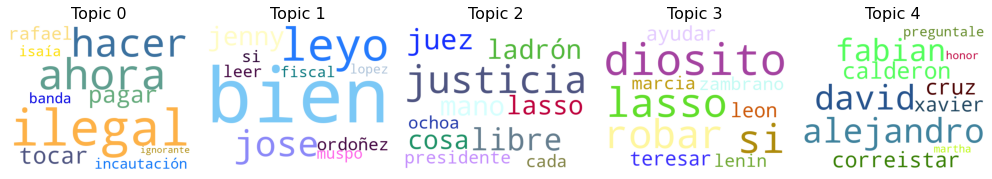

In [264]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.XKCD_COLORS.items()]  # mas colores: 'mcolors.XKCD_COLORS'      mcolors.TABLEAU_COLORS
cloud = WordCloud(stopwords=leman,
                  background_color='white',
                  width=500,
                  height=400,
                  max_words=15,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[random.randint(0, 500)], # cols[i]
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

import random
fig, axes = plt.subplots(1, num_topics, figsize=(10,10), sharex=True, sharey=True)
randomicos=[]
for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=250
                                   )
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
fig.patch.set_facecolor('xkcd:white')
if num_topics >4 and num_topics <=6:
    fig.set_figwidth(14)
    fig.set_figheight(3)
elif num_topics <=4:
    fig.set_figwidth(12)
    fig.set_figheight(4)
elif num_topics >=7 and num_topics <=10:
    fig.set_figwidth(16)
    fig.set_figheight(3)
elif num_topics >=10 and num_topics <=15:
    fig.set_figwidth(18)
    fig.set_figheight(4)
plt.show()
fig.savefig('C://xampp//htdocs//tesis//imagenTopics//topics_6_36.png')

In [265]:
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show,save
from bokeh.plotting import  output_file as out_boken
from bokeh.models import Label
from bokeh.io import output_notebook
import numpy as np

# obtener los pesos de los Topicos 
topics_coments = df_topic_sents_keywords
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])
            
    # array de los pesos de los Topicos 
arr = pd.DataFrame(topic_weights).fillna(0).values

        # mantener los puntos separados 
        #arr = arr[np.amax(arr, axis=1) > 0.35]

        # topico dominante en cada documento 
topic_num = np.argmax(arr, axis=1)
if len(leman) <=35:
    tsne_model = TSNE(n_components=2, verbose=2, random_state=2050, perplexity=30, early_exaggeration=120, n_iter=280, angle=.99, init='pca')
elif len(leman) >35 and len(leman)<=60:
    tsne_model = TSNE(n_components=2, verbose=2, random_state=2050, perplexity=30, early_exaggeration=120, n_iter=400, angle=.99, init='pca')
elif len(leman) >60 and len(leman) <=120:
    tsne_model = TSNE(n_components=2, verbose=2, random_state=2050, perplexity=30, early_exaggeration=120, n_iter=550, angle=.99, init='pca')
elif len(leman)>120:
    tsne_model = TSNE(n_components=2, verbose=2, random_state=2050, perplexity=30, early_exaggeration=120, n_iter=800, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr) 
        
    
topics_coments['x'] = tsne_lda[:,0]
topics_coments['y'] = tsne_lda[:,1]


topics_coments['x'] = tsne_lda[:,0]
topics_coments['y'] = tsne_lda[:,1]
cluster_colors = {0: 'blue', 1: 'green', 2: 'yellow', 3: 'red', 4: 'skyblue', 5:'salmon', 6:'orange', 7:'maroon', 8:'crimson', 9:'black', 10:'gray',11:'coral',12:'cyan',13:'violet',14:'orange'}
topics_coments['colors'] = topics_coments['topico'].apply(lambda l: cluster_colors[l])
top_labels = {0: 'Topico 1', 1:'Topico 2', 2:'Topico 3', 3:'Topico 4', 4:'Topico 5',5:'Topico 6',6:'Topico 7',7:'Topico 8', 8:'Topico 9',9:'Topico 9',10:'Topico 10',11:'Topico 11',12:'Topico 12',13:'Topico 13',14:'Topico 14'}

topics_coments


from bokeh.palettes import all_palettes
from bokeh.models import HoverTool, CustomJS, Slider
from bokeh.models import ColumnDataSource, HoverTool

topics_coments['topico']= topics_coments['topico'].astype(np.int64)

source = ColumnDataSource(data=dict(
                                    x = topics_coments.x, 
                                    y = topics_coments.y, 
                                    colors = [all_palettes['Set1'][num_topics+1][i] for i in topics_coments.topico],
                                    title=topics_coments.comentario,
                                    alpha = [0.9] * topics_coments.shape[0],
                                    size = [7] * topics_coments.shape[0]
                                    ))
source = ColumnDataSource(dict(
                x = topics_coments['x'],
                y = topics_coments['y'],
                color = topics_coments['colors'],
                label  = topics_coments['topico'].apply(lambda l: top_labels[l]),
                #topic_key = embedding['hue'],
                content = topics_coments['comentario']
            ))
        
title = 'TSNE ITERACTIVO'
plot_lda = figure(plot_width = 1000, plot_height = 600,
                 title= title, tools="pan,wheel_zoom,box_zoom,reset,hover",
                  x_axis_type=None, y_axis_type=None, min_border=1
                 )
plot_lda.scatter(x='x', y='y', legend='label', source=source,
                 color='color', alpha=0.7, size=10)
        
hover = plot_lda.select(dict(type= HoverTool))
hover.tooltips = {"Comentario":"@content","Topico":"@label"}
plot_lda.legend.location ='top_left'
output_file('itera46.html')
show(plot_lda)
#show(plot_lda)


C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 284 samples in 0.001s...
[t-SNE] Computed neighbors for 284 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 284 / 284
[t-SNE] Mean sigma: 0.094499
[t-SNE] Computed conditional probabilities in 0.016s
[t-SNE] Iteration 50: error = 971.3908081, gradient norm = 1.7048329 (50 iterations in 0.083s)
[t-SNE] Iteration 100: error = 975.5444336, gradient norm = 1.7627681 (50 iterations in 0.083s)
[t-SNE] Iteration 150: error = 976.9129639, gradient norm = 1.6628067 (50 iterations in 0.092s)
[t-SNE] Iteration 200: error = 960.9531250, gradient norm = 1.7808098 (50 iterations in 0.084s)
[t-SNE] Iteration 250: error = 969.5766602, gradient norm = 1.6156278 (50 iterations in 0.085s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 969.576660
[t-SNE] Iteration 300: error = 1.1018381, gradient norm = 0.0122540 (50 iterations in 0.079s)
[t-SNE] Iteration 350: error = 0.2510889, gradient norm = 0.007

In [163]:
df_topic_sents_keywords[df_topic_sents_keywords['topico'].isin([1])] 

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,topico,coherencia,palabras claves,comentario,x,y,colors
1,1,96.87,"buen, telefono, mejor, bateria, funcionar, exi...",El A70 luce una impresionante pantalla de 6.7 ...,257.478363,-1214.235229,green
4,1,97.87,"buen, telefono, mejor, bateria, funcionar, exi...",Este teléfono no fue desbloqueado correctament...,320.895233,-1188.234131,green
16,1,87.08,"buen, telefono, mejor, bateria, funcionar, exi...",Los juegos que se descarguen funcionan lento n...,231.425903,-1132.823364,green
19,1,74.23,"buen, telefono, mejor, bateria, funcionar, exi...",Resistente a las caídas,392.886505,-1185.447266,green
20,1,80.31,"buen, telefono, mejor, bateria, funcionar, exi...",El Ram del celular es muy bueno,410.901733,-1250.551270,green
24,1,60.50,"buen, telefono, mejor, bateria, funcionar, exi...",Lindo,428.073853,-1096.829590,green
25,1,74.83,"buen, telefono, mejor, bateria, funcionar, exi...",Comprarás algo que valga,294.882019,-1016.360229,green
26,1,74.81,"buen, telefono, mejor, bateria, funcionar, exi...",Me gusga muy bueno,294.617676,-1081.062256,green
28,1,61.02,"buen, telefono, mejor, bateria, funcionar, exi...",Feo,351.270477,-1115.640747,green


In [164]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def colorIteractivo(num_topicos):
    cont = 0
    color = {}
    for i in range(num_topicos):
        #color[cont]=list(np.random.choice(range(256), size=3))
        color[cont] = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
        cont +=1
    return color 

colorIteractivo(5)

In [131]:
len(corpus)

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


31

In [64]:
df_topic_sents_keywords

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,topico,coherencia,palabras claves,comentario
0,3.0,71.51,"diosito, lasso, robar, si, ayudar, leon, teres...",El poder de don dinero es evidente en la justi...
1,3.0,93.08,"diosito, lasso, robar, si, ayudar, leon, teres...",Así como vamos se debe reescribir la historia....
2,3.0,86.60,"bien, leyo, jose, jenny, ordoñez, leer, si, mu...",Apoyo total a la Fiscal Diana Salazar.
3,3.0,91.04,"ilegal, ahora, hacer, pagar, tocar, rafael, in...",Alguien sabe cuántos años tiene este proceso j...
4,3.0,65.30,"alejandro, david, fabian, calderon, correistar...",La Fiscal se merece otro reconocimiento por su...
...,...,...,...,...
279,3.0,73.33,"justicia, libre, juez, mano, ladrón, lasso, co...",Leonardo Zúñiga
280,3.0,84.00,"alejandro, david, fabian, calderon, correistar...",Xavier Cruz Preguntale a un correista...
281,3.0,84.00,"diosito, lasso, robar, si, ayudar, leon, teres...",Teresa Leon ayudar a robar
282,3.0,97.03,"ilegal, ahora, hacer, pagar, tocar, rafael, in...","Ricardo Ochoa otro IGNORANTE, señor, a mi no m..."


In [66]:
cp = df_topic_sents_keywords
cp

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,topico,coherencia,palabras claves,comentario
0,3.0,71.51,"diosito, lasso, robar, si, ayudar, leon, teres...",El poder de don dinero es evidente en la justi...
1,3.0,93.09,"diosito, lasso, robar, si, ayudar, leon, teres...",Así como vamos se debe reescribir la historia....
2,1.0,86.60,"bien, leyo, jose, jenny, ordoñez, leer, si, mu...",Apoyo total a la Fiscal Diana Salazar.
3,0.0,91.04,"ilegal, ahora, hacer, pagar, tocar, rafael, in...",Alguien sabe cuántos años tiene este proceso j...
4,4.0,65.30,"alejandro, david, fabian, calderon, correistar...",La Fiscal se merece otro reconocimiento por su...
...,...,...,...,...
279,2.0,73.33,"justicia, libre, juez, mano, ladrón, lasso, co...",Leonardo Zúñiga
280,4.0,84.00,"alejandro, david, fabian, calderon, correistar...",Xavier Cruz Preguntale a un correista...
281,3.0,84.00,"diosito, lasso, robar, si, ayudar, leon, teres...",Teresa Leon ayudar a robar
282,0.0,97.03,"ilegal, ahora, hacer, pagar, tocar, rafael, in...","Ricardo Ochoa otro IGNORANTE, señor, a mi no m..."


In [67]:
cp['topico'] = [i+1 for i in cp['topico']]

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
cp['topico'].values

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([4., 4., 2., 1., 5., 3., 4., 5., 4., 4., 2., 2., 3., 5., 4., 3., 3.,
       4., 4., 4., 5., 4., 1., 5., 5., 5., 4., 4., 1., 3., 2., 1., 3., 4.,
       5., 3., 3., 3., 3., 5., 3., 4., 1., 5., 3., 2., 2., 4., 1., 1., 3.,
       4., 2., 5., 4., 3., 3., 5., 4., 4., 1., 4., 4., 1., 1., 1., 4., 4.,
       5., 5., 4., 1., 5., 3., 2., 3., 2., 2., 4., 1., 1., 4., 2., 3., 1.,
       3., 2., 3., 2., 4., 3., 3., 1., 1., 2., 3., 2., 1., 4., 3., 2., 4.,
       2., 4., 3., 3., 4., 5., 2., 2., 3., 1., 2., 2., 4., 5., 4., 1., 4.,
       2., 4., 5., 5., 4., 1., 1., 3., 4., 2., 3., 4., 1., 1., 1., 5., 1.,
       2., 4., 5., 4., 3., 2., 4., 2., 1., 4., 5., 5., 2., 2., 5., 1., 5.,
       1., 5., 2., 3., 2., 4., 3., 3., 1., 3., 3., 1., 1., 2., 5., 3., 4.,
       2., 5., 2., 1., 1., 2., 3., 2., 5., 3., 3., 3., 5., 1., 5., 1., 1.,
       2., 2., 3., 4., 3., 5., 1., 4., 2., 4., 2., 4., 3., 2., 5., 1., 1.,
       1., 3., 3., 1., 2., 1., 1., 1., 4., 2., 5., 2., 2., 5., 4., 1., 1.,
       1., 5., 3., 4., 4.

In [136]:
diccionario_LDA

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [229]:
len(leman)

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


284